# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [36]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [5]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [17]:
# Regressão linear de tip explicada por net_bill
model = smf.ols(formula='tip ~ net_bill', data=tips).fit()

# Resumo da regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           5.02e-23
Time:                        17:04:11   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

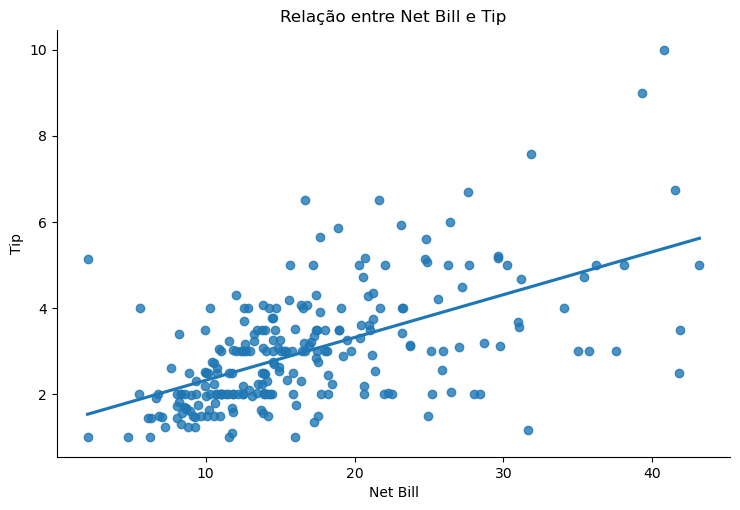

In [19]:
# Gráfico de dispersão com linha de regressão
sns.lmplot(x='net_bill', y='tip', data=tips, aspect=1.5, ci=None)

# Configurando o título e os rótulos
plt.title('Relação entre Net Bill e Tip')
plt.xlabel('Net Bill')
plt.ylabel('Tip')

# Mostrando o gráfico
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [21]:
# Ajustando o modelo de regressão de tip_pct explicado por net_bill
model_tip_pct = smf.ols(formula='tip_pct ~ net_bill', data=tips).fit()

# Resumo da regressão
print(model_tip_pct.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           1.52e-06
Time:                        19:28:43   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

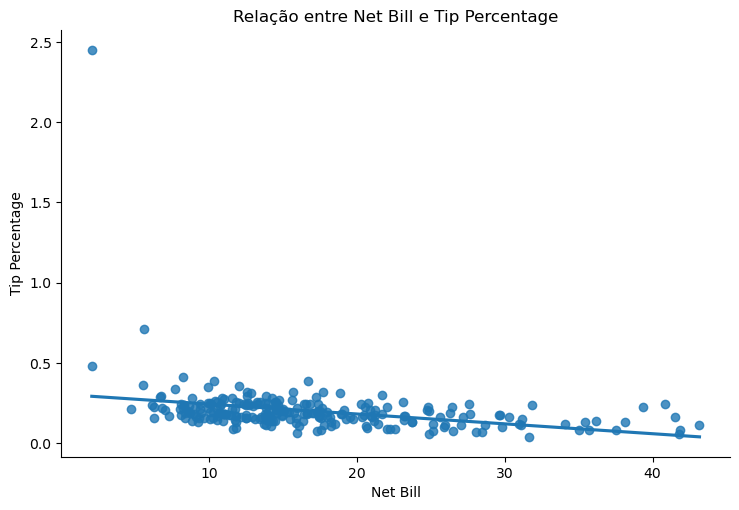

In [23]:
# Gráfico de dispersão com linha de regressão para tip_pct por net_bill
sns.lmplot(x='net_bill', y='tip_pct', data=tips, aspect=1.5, ci=None)

# Configurando o título e os rótulos
plt.title('Relação entre Net Bill e Tip Percentage')
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')

# Mostrando o gráfico
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

#### Comparação dos Gráficos:

**Gráfico 1: tip vs. net_bill:**

Mostra uma clara tendência positiva: à medida que o valor da conta líquida (net_bill) aumenta, a gorjeta (tip) também aumenta.
A linha de regressão é inclinada para cima, refletindo a relação positiva.

#### Gráfico 2: 
**tip_pct vs. net_bill:**

Mostra uma relação negativa: à medida que o valor da conta líquida (net_bill) aumenta, o percentual da gorjeta (tip_pct) tende a diminuir.
A linha de regressão é inclinada para baixo, indicando que gorjetas mais altas (em valor) não aumentam proporcionalmente com o valor da conta.
Diferença do Ajuste:

#### R²:
**Modelo 1 (tip vs. net_bill):**
R² de 0.333 indica que 33.3% da variação na gorjeta pode ser explicada pelo valor da conta líquida.

**Modelo 2 (tip_pct vs. net_bill):** 
R² de 0.091 indica que apenas 9.1% da variação no percentual da gorjeta pode ser explicada pelo valor da conta líquida.

#### Comparação do R²:
Não é apropriado comparar diretamente os R² dos dois modelos, pois as variáveis dependentes (tip e tip_pct) são diferentes. Cada R² reflete a adequação do modelo em explicar a variância de sua respectiva variável dependente, mas como elas medem coisas distintas (valor absoluto da gorjeta vs. percentual), a comparação direta pode ser enganosa.

#### Conclusão:
O modelo **tip vs. net_bill** tem um ajuste melhor (R² maior) e sugere uma relação linear positiva clara.
O modelo **tip_pct vs. net_bill** indica uma relação mais fraca e negativa, com menor explicação da variância (R² mais baixo).

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [32]:
# Obtendo os valores preditos para tip_pct
pred = model_tip_pct.fittedvalues

# Exibindo os primeiros valores preditos
print(pred.head())

0    0.207087
1    0.251951
2    0.197684
3    0.180107
4    0.176358
dtype: float64


In [34]:
# Valores preditos para tip_pct
tip_pct_pred = model_tip_pct.fittedvalues

# Calculando os valores preditos para tip
tip_pred = tip_pct_pred * tips['net_bill']

# Exibindo os primeiros valores preditos para tip
print(tip_pred.head())

0    3.309254
1    2.186938
2    3.461450
3    3.668785
4    3.699998
dtype: float64


In [46]:
# Valores reais de tip
tip_real = tips['tip']

# Calculando o R²
r2_tip_model = r2_score(tip_real, tip_pred)

# Exibindo o valor de R²
print(f'R² do modelo para tip: {r2_tip_model:.4f}')

R² do modelo para tip: 0.1089


___

***R² : 0.333***
 Aproximadamente 33.3% da variação na variável dependente tip é explicada pela variável independente net_bill. Isso indica um ajuste relativamente razoável para o modelo.

***R²: 0.1089***
 Aproximadamente 10.9% da variação na variável dependente tip_pct é explicada pela variável independente net_bill. Esse valor é consideravelmente mais baixo e indica que o modelo não explica bem a variação no percentual da gorjeta.